In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pyCloudy as pc

In [3]:
!mkdir ../SIGNALS_models
dir_ = '../SIGNALS_models'

mkdir: ../SIGNALS_models: File exists


In [4]:
model_name = 'M1'
# An object is created (instatiated). It is in charge of the Cloudy input file. 
# Give the name of the model when instantiate the Class to the Min object.
Min = pc.CloudyInput('{}/{}'.format(dir_, model_name))

In [5]:
help(pc.CloudyInput)

Help on class CloudyInput in module pyCloudy.c1d.cloudy_model:

class CloudyInput(builtins.object)
 |  CloudyInput(model_name=None)
 |  
 |  Object used to create and write input file for Cloudy code.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model_name=None)
 |      - model_name : name of the model. Used to name the input file and all the output files.
 |      The other parameters of the model are set using the methods
 |  
 |  import_file(self, file_=None)
 |      Import a file that will be append to the input file.
 |  
 |  init_all(self)
 |  
 |  print_input(self, to_file=True, verbose=False)
 |      This is the method to print the input file.
 |      Parameters:
 |          - to_file: Boolean. If True (default), print to the file defined as model_name + '.in'
 |          - verbose: Boolean. If True (not default), print to the standart output
 |  
 |  print_make_file(self, dir_=None)
 |      Call pc.print_make_file. 
 |      Parameter:
 |          dir_:    if None, ext

In [6]:
# Some parameters of the models are transimted to the Min object.
# The ionizing SED is a Blackbody in this example. Other SEDs can also be defined, see set_star method.
Min.set_BB(Teff=40000, lumi_unit='luminosity solar total', lumi_value=5)
# A constant density is used.
Min.set_cste_density(2)
# The inner radius is given (a second argument can set the outer radius)
Min.set_radius(18.5)
# Cloudy predefined abundance set is asumed. Element by element abundance can also be defined, using a dictionnary.
Min.set_abund(predef='ism', nograins=False)
# Anything that is not available by dedicated method can always be done using the "set_other" method.
Min.set_other(('Cosmic Rays Background'))
#Min.set_other(('set dr 0'))
# Stoping criteria can be defined.
#Min.set_stop(('zone = 1'))

In [7]:
# Once all the model parameters have been defined suing the collection of "set_" methods, the input file is printed out.
Min.print_input()

In [8]:
!cat ../SIGNALS_models/M1.in

////////////////////////////////////
title M1
////////////////////////////////////
set punch prefix "M1"
Blackbody 40000.000000
luminosity solar total = 5.000
radius = 18.500
hden = 2.000
filling factor = 1.0
abundances ism
Cosmic Rays Background
save last radius ".rad"
save last continuum ".cont"
save last physical conditions ".phy"
save last overview ".ovr"
save last heating ".heat"
save last cooling ".cool"
save last optical depth ".opd"
save last grain temperature ".gtemp"
save last grain abundances ".gabund"
save last grain D/G ratio ".gdgrat"
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save last element carbon ".ele_C"
save last element nitrogen ".ele_N"
save last element oxygen ".ele_O"
save last element argon ".ele_Ar"
save last element neon ".ele_Ne"
save last element sulphur ".ele_S"
save last element chlorin ".ele_Cl"
save last element iron ".ele_Fe"
save last element silicon ".ele_Si"


In [9]:
# The list of the saved file can be edited.
pc.config.SAVE_LIST

[['radius', '.rad'],
 ['continuum', '.cont'],
 ['physical conditions', '.phy'],
 ['overview', '.ovr'],
 ['heating', '.heat'],
 ['cooling', '.cool'],
 ['optical depth', '.opd']]

In [10]:
# We tell pyCloudy where the executable is:
#pc.config.cloudy_exe = '/usr/local/Cloudy/c17.02/source/cloudy.exe'
pc.config.cloudy_exe = 'cloudy.exe'

In [11]:
# We can run Cloudy from within the script:
Min.run_cloudy()

In [12]:
!ls -l ../SIGNALS_models/M1.*

-rw-r--r--  1 christophemorisset  staff  893349 Jun 15 11:28 ../SIGNALS_models/M1.cont
-rw-r--r--  1 christophemorisset  staff   20929 Jun 15 11:28 ../SIGNALS_models/M1.cool
-rw-r--r--  1 christophemorisset  staff   24948 Jun 15 11:28 ../SIGNALS_models/M1.ele_Ar
-rw-r--r--  1 christophemorisset  staff   17612 Jun 15 11:28 ../SIGNALS_models/M1.ele_C
-rw-r--r--  1 christophemorisset  staff   23727 Jun 15 11:28 ../SIGNALS_models/M1.ele_Cl
-rw-r--r--  1 christophemorisset  staff   34716 Jun 15 11:28 ../SIGNALS_models/M1.ele_Fe
-rw-r--r--  1 christophemorisset  staff    5415 Jun 15 11:28 ../SIGNALS_models/M1.ele_H
-rw-r--r--  1 christophemorisset  staff    5419 Jun 15 11:28 ../SIGNALS_models/M1.ele_He
-rw-r--r--  1 christophemorisset  staff   11511 Jun 15 11:28 ../SIGNALS_models/M1.ele_N
-rw-r--r--  1 christophemorisset  staff   15180 Jun 15 11:28 ../SIGNALS_models/M1.ele_Ne
-rw-r--r--  1 christophemorisset  staff   16390 Jun 15 11:28 ../SIGNALS_models/M1.ele_O
-rw-r--r--  1 christophemoris

In [14]:
# The output files for the M1 model are read by the CloudyModel object when instantiating it.
M = pc.CloudyModel('{}/{}'.format(dir_, model_name), read_emis=False)

In [15]:
help(pc.CloudyModel)

Help on class CloudyModel in module pyCloudy.c1d.cloudy_model:

class CloudyModel(builtins.object)
 |  CloudyModel(model_name, verbose=None, read_all_ext=True, read_rad=True, read_phy=True, read_emis=True, read_grains=False, read_cont=True, read_heatcool=False, read_lin=False, read_opd=False, read_pressure=False, read_abunds=False, list_elem=['H', 'He', 'C', 'N', 'O', 'Ne', 'Ar', 'S', 'Cl', 'Fe', 'Si'], distance=None, line_is_log=False, emis_is_log=True, ionic_str_key='ele_')
 |  
 |  Read the outputs of Cloudy into variables of the object. Also perform some computations
 |  like T0, t2 for all the ions and lines.
 |  Provides methods to access some outputs (e.g. continuum in various units)
 |  
 |  The Cloudy model must have been run with the following punch or save in the input file:
 |  
 |  set punch prefix "MODEL" (can be changed)
 |  punch last radius ".rad"
 |  punch last continuum ".cont"
 |  punch last physical conditions ".phy"
 |  punch last overview ".ovr"
 |  punch last gr

In [16]:
# The M object includes a lot of methods to deal with the data saved in the Cloudy model output files.
# A method can give a summary of the model, to check that the results are close to what expected.
M.print_stats()

 Name of the model: ../SIGNALS_models/M1
 R_in (cut) = 3.162e+18 (3.162e+18), R_out (cut) = 6.406e+18 (6.406e+18)
 H+ mass = 7.90e+01, H mass = 8.15e+01 N zones: 135
 <H+/H> = 0.98, <He++/He> = 0.00, <He+/He> = 0.90
 <O+++/O> = 0.00, <O++/O> = 0.45, <O+/O> = 0.54
 <N+++/N> = 0.00, <N++/N> = 0.59, <N+/N> = 0.39
 T(O+++) = 6988, T(O++) = 6676, T(O+) = 7352
 <ne> = 106,  <nH> = 100, T0 = 7057, t2=0.0089
 <log U> = -2.23


In [17]:
# The abundances used in the model are stored into a dictionary.
print(M.abund)

{'H': 0.0, 'He': -1.0088, 'C': -3.6003, 'N': -4.1002, 'O': -3.4962, 'F': -7.699, 'Ne': -3.9101, 'Na': -6.5003, 'Mg': -4.8996, 'Al': -7.1002, 'Si': -5.5003, 'P': -6.7959, 'S': -4.4895, 'Cl': -7.0, 'Ar': -5.5498, 'K': -7.9586, 'Ca': -9.3872, 'Ti': -9.2366, 'Cr': -8.0, 'Mn': -7.6383, 'Fe': -6.2, 'Co': -8.2291, 'Ni': -7.7399, 'Cu': -8.8239, 'Zn': -7.699}


In [18]:
# Part of the main Cloudy model output file are extracted from the file and stored into a dictionary.
M.out

{'Cloudy ends': ' Cloudy ends: 135 zones, 1 iteration, 3 cautions. (single thread) ExecTime(s) 38.43\n',
 'stop': '   Calculation stopped because lowest Te reached. Iteration 1 of 1\n',
 'Blackbody': '                       * Blackbody 40000.000000                                                          *\n',
 'luminosity': '                       * luminosity solar total = 5.000                                                  *\n',
 'hden': '                       * hden = 2.000                                                                    *\n',
 'SED1': '           L(nu>1ryd):  38.1988   Average nu:1.370E+00   L( X-ray):   8.2893   L(BalC):  38.3258     Q(Balmer C):  49.2217\n',
 'SED2': '           Q(1.0-1.8):  48.6742   Q(1.8-4.0):  47.7570   Q(4.0-20):  44.6232   Q(20--):  17.6326     Ion pht flx:4.213E+10\n',
 'SED3': '           L(gam ray):   0.0000   Q(gam ray):   0.0000   L(Infred):  37.1064   Alf(ox):   0.0000     Total lumin:  38.5827\n',
 'SED4': '           log L/Ls

In [19]:
# Comments, cautions and warnings are also available.
print(M.comments)
print('-----------------')
print(M.cautions)
print('-----------------')
print(M.warnings)

[]
-----------------
[' C-Continuum zero at some energies.\n', ' C-R(out)/R(in)=2.03e+00 and SPHERE was not set.\n']
-----------------
['  !Modified data files were used in this simulation. This is fine if it was done intentionally.\n', '  !Charge transfer H => H+ reached 1100.9% of the local H ionization rate.\n', '  !AGE: Cloud age was not set.  Longest timescale was 3.56e+11 s = 1.13e+04 years.\n', '  !The CMB was not included.  This is added with the CMB command.\n']


In [20]:
# The mean of the ionization parameter over the volume of the nebula is available. 
# It may be weighted by the electron*hydrogen density (useful if the model goes into the neutral region).
print(M.log_U_mean, M.log_U_mean_ne)

-2.2281101895410416 -2.221293156665746


In [21]:
M.log_U_mean_ne?

Type:        property
String form: <property object at 0x19190e7fb0>
Docstring:   log of mean value of U on the volume weighted by ne.nH


In [22]:
M.log_U_mean_ne??

Type:        property
String form: <property object at 0x19190e7fb0>
Source:     
# M.log_U_mean_ne.fget
@property
def log_U_mean_ne(self):
    """ log of mean value of U on the volume weighted by ne.nH"""
    if self.log_U is not None:
        return np.log10(self.vol_mean(10**self.log_U, self.nenH))
    else:
        return None


In [23]:
print(M.vol_mean(M.log_U), np.log10(M.vol_mean(10**M.log_U)))

-2.2596469822795506 -2.2281101895410416


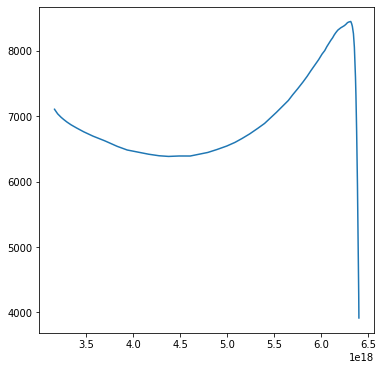

In [24]:
# Most of the radial varying parameters are easily accessed and ploted.
f, ax = plt.subplots(figsize=(6,6))
ax.plot(M.radius, M.te);

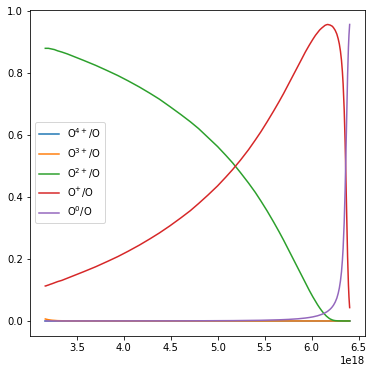

In [25]:
# Ionic fraction of any element are accessible to be ploted versus the radius of the nebula.
f, ax = plt.subplots(figsize=(6,6))
ax.plot(M.radius, M.get_ionic('O',4), label=r'O$^{4+}$/O')
ax.plot(M.radius, M.get_ionic('O',3), label=r'O$^{3+}$/O')
ax.plot(M.radius, M.get_ionic('O',2), label=r'O$^{2+}$/O')
ax.plot(M.radius, M.get_ionic('O',1), label=r'O$^{+}$/O')
ax.plot(M.radius, M.get_ionic('O',0), label=r'O$^{0}$/O')
ax.legend(loc='best');

In [26]:
# Electron temeprature weighted by ionic fraction and electron density are also available.
print(r'<Te>$_{O^0/O.Ne}$ =', M.get_T0_ion_vol_ne('O',0))
print(r'<Te>$_{O^+/O.Ne}$ =', M.get_T0_ion_vol_ne('O',1))
print(r'<Te>$_{O^{2+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',2))
print(r'<Te>$_{O^{3+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',3))

<Te>$_{O^0/O.Ne}$ = 7835.807708621695
<Te>$_{O^+/O.Ne}$ = 7352.064263775291
<Te>$_{O^{2+}/O.Ne}$ = 6676.167373896371
<Te>$_{O^{3+}/O.Ne}$ = 6987.592847829119


In [27]:
# Ionic fractions (weighted by Ne or not)
print(M.get_ab_ion_vol('O',2))
print(M.get_ab_ion_vol_ne('O',2))

0.43166006339451757
0.4480400031026328


In [28]:
# A ploting tool to visualize the spectra is available.
help(M.get_cont_x)
print('---------------')
help(M.get_cont_y)
print('---------------')
help(M.plot_spectrum)

Help on method get_cont_x in module pyCloudy.c1d.cloudy_model:

get_cont_x(unit='Ryd') method of pyCloudy.c1d.cloudy_model.CloudyModel instance
    param:
        unit : one of ['Ryd','eV','Ang','mu','cm-1','Hz', 'kHz', 'MHz', 'GHz']
    return:
        continuum X: wavelength, energys, wv number, or frequency

---------------
Help on method get_cont_y in module pyCloudy.c1d.cloudy_model:

get_cont_y(cont='incid', unit='es', dist_norm='at_earth') method of pyCloudy.c1d.cloudy_model.CloudyModel instance
    param:
        cont : one of ['incid','trans','diffout','ntrans','reflec', 'total']
        unit : one of ['esc' for erg/s/cm2, 
                       'ec3'for erg/s/cm2/C C : lightspeed,
                       'es' for erg/s,
                       'esA' for erg/s/AA,
                       'esHz' for erg/s/Hz,
                       'esAc' for erg/s/AA/cm2,
                       'ec3A' for erg/s/AA/cm2/C C : lighspeed
                       'esHzc' for erg/s/Hz/cm2,
             

(0, 100000.0)

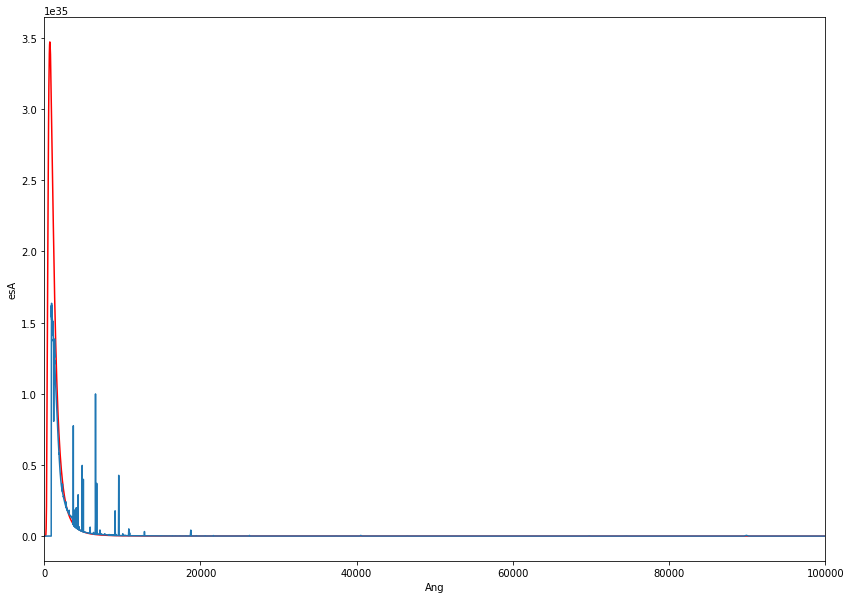

In [29]:
# The area under the red curve and under the blue curve are the same (in IR the blue curve is slightly over the red one)
f, ax = plt.subplots(figsize=(14,10))
M.plot_spectrum(cont='incid', ax=ax, c='r', xunit='Ang', yunit='esA', xlog=False, ylog=False)
M.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', yunit='esA', xlog=False, ylog=False)
ax.set_xlim((0, 1e5))

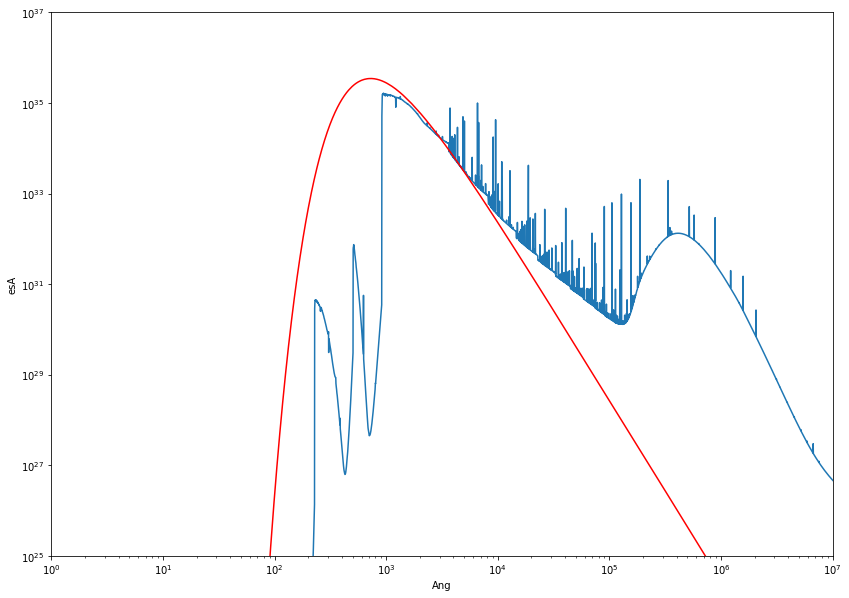

In [30]:
f, ax = plt.subplots(figsize=(14,10))
M.plot_spectrum(ax=ax, xunit='Ang', yunit='esA')
M.plot_spectrum(cont='incid', ax=ax, c='r', xunit='Ang', yunit='esA')
ax.set_xlim((1, 1e7))
ax.set_ylim((1e25, 1e37));

In [31]:
print(np.log10(M.Q0))

48.72384163941054


# Grid of models

In [32]:
# A function is used to produce input file dpeending on a given parameter, here the inner radius.
def make_model(dir_, name, radius):
    # The name of the model must depend on the varying parameter, to avoid overwriting of the files
    Min = pc.CloudyInput('{}/{}_{}'.format(dir_, name, radius)) 
    Min.set_BB(Teff=40000, lumi_unit='Q(H)', lumi_value=48.7)
    Min.set_cste_density(2)
    Min.set_radius(radius)
    Min.set_abund(predef='ism', nograins=False)
    Min.set_other(('Cosmic Rays Background'))
    #Min.set_other(('set dr 0'))
    #Min.set_stop(('zone = 1'))    
    Min.print_input() #We do not run the model, only print the input file

In [33]:
# A grid of 6 model input files is done.
name = 'M2'
for radius in np.linspace(13, 23,6):
    make_model(dir_, name, radius)

In [34]:
# This will create a Makefile in the model directory
# The make command is used to run the models in parallel
pc.print_make_file(dir_)

In [35]:
!cat ../SIGNALS_models/Makefile

CLOUDY = cloudy.exe

SRC = $(wildcard ${name}*.in)
OBJ = $(SRC:.in=.out)

# Usage: make -j N name='NAME'
# N is the number of processors
# optional: NAME is a generic name, all models named NAME*.in will be run
# C. Morisset

all: $(OBJ)

%.out: %.in
	-$(CLOUDY) < $< > $@
# Notice the previous line has TAB in first column


In [36]:
# The 6 models are run using the Makefile
pc.run_cloudy(dir_=dir_, n_proc=6, use_make=True)

In [37]:
# The models are read into a list of CloudyModel objects
Ms = pc.load_models('{}/{}'.format(dir_, name), read_emis=False)

In [38]:
# The list is sorted according to the inner radius
Ms = sorted(Ms, key = lambda M:M.r_in)

In [39]:
# It is very easy to loop on any of the model parameters. Here we explore the string describing how Cloudy ended.
for M in Ms:
    print(M.model_name_s, M.out['Cloudy ends'])

M2_13.0  Cloudy ends: 454 zones, 1 iteration, 20 warnings, 3 cautions. (single thread) ExecTime(s) 90.08

M2_15.0  Cloudy ends: 337 zones, 1 iteration, 12 warnings, 4 cautions. (single thread) ExecTime(s) 74.57

M2_17.0  Cloudy ends: 218 zones, 1 iteration, 3 cautions. (single thread) ExecTime(s) 57.85

M2_19.0  Cloudy ends: 108 zones, 1 iteration, 2 cautions. (single thread) ExecTime(s) 36.38

M2_21.0  Cloudy ends: 1 zone, 1 iteration, 7 cautions. (single thread) ExecTime(s) 7.59

M2_23.0  Cloudy ends: 1 zone, 1 iteration, 7 cautions. (single thread) ExecTime(s) 21.73



In [40]:
# Using list comprehension, it is easy to generate tables of the varying parameters.
print('Inner R', ['{:8.2f}'.format(np.log10(M.r_in)) for M in Ms])
print('Outer R', ['{:8.2f}'.format(np.log10(M.r_out)) for M in Ms])
print('<Te>   ', ['{:8.2f}'.format(M.T0) for M in Ms])
print('<logU> ', ['{:8.2f}'.format(M.log_U_mean_ne) for M in Ms])
print('H0/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',0)) for M in Ms])
print('H+/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',1)) for M in Ms])
print('H2/H   ', ['{:8.2f}'.format(2*M.get_ab_ion_vol_ne('H',2)) for M in Ms])
print('O++/O  ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('O',2)) for M in Ms])

Inner R ['   13.00', '   15.00', '   17.00', '   19.00', '   21.00', '   23.00']
Outer R ['   18.74', '   18.74', '   18.74', '   19.04', '   21.00', '   23.00']
<Te>    [' 7232.04', ' 7232.10', ' 7224.73', ' 7170.51', ' 1887.10', '   15.78']
<logU>  ['   -1.86', '   -1.86', '   -1.87', '   -2.91', '   -6.88', '  -10.88']
H0/H    ['    0.02', '    0.02', '    0.02', '    0.03', '    0.91', '    0.24']
H+/H    ['    0.98', '    0.98', '    0.98', '    0.97', '    0.09', '    0.00']
H2/H    ['    0.00', '    0.00', '    0.00', '    0.00', '    0.00', '    0.76']
O++/O   ['    0.52', '    0.52', '    0.52', '    0.13', '    0.00', '    0.00']


(10, 100000000.0)

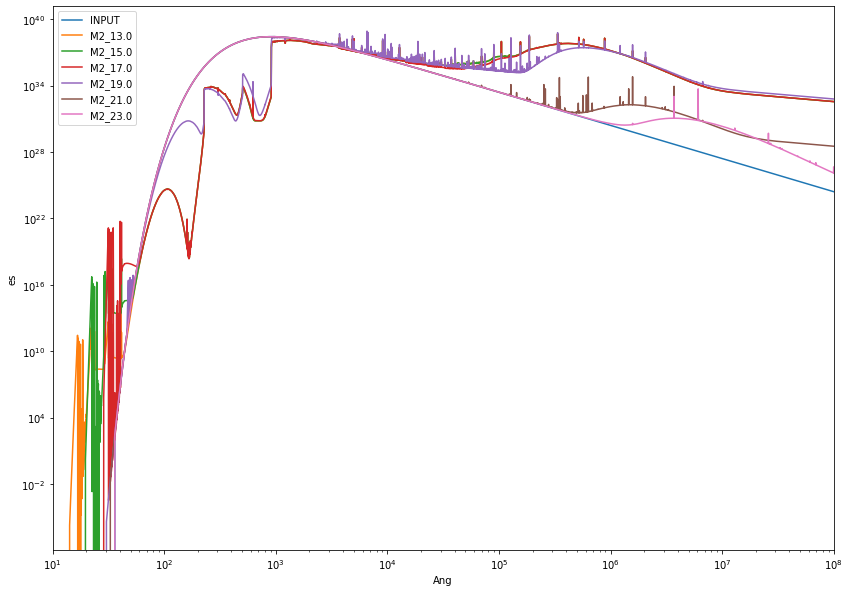

In [41]:
# Overplotting of the spectra of all the models is easy obtained
f, ax = plt.subplots(figsize=(14, 10))
M.plot_spectrum(label='INPUT', ax=ax, xunit='Ang', cont='incid')
for M in Ms:
    M.plot_spectrum(label=M.model_name_s, ax=ax, xunit='Ang')
ax.legend()
ax.set_xlim((10, 1e8))